In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip /content/drive/MyDrive/dataset.zip -d /content/dataset

Archive:  /content/drive/MyDrive/dataset.zip
   creating: /content/dataset/dataset/dataset/
   creating: /content/dataset/dataset/dataset/iranKhodro_dena/
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/1.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/10.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/100.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/101.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/102.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/103.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/104.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/105.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/106.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/107.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro_dena/108.jpg  
  inflating: /content/dataset/dataset/dataset/iranKhodro

In [ ]:
import sys
import glob
import cv2
import numpy as np
import os

from shutil import copytree
from shutil import rmtree



import pickle
import math, re
from os import path

import tensorflow as tf
import tensorflow.keras as keras
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adamax, RMSprop
import matplotlib.pyplot as plt

import pandas as pd
import random
import shutil
import pathlib

## **Data preparation**

In this cell you're going to:
1.   Read images
2.   Preprocess them
3.   Create labels from the dirs.

Don't forget to create test, val and train sets

Split them appropriately

If you want to use **ImageDataGenerator** please write your final dataset in a directory


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#####################################

##### Your implementation here ######
import splitfolders
input_folder = "/content/dataset"
output = "/content/dataset/data"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1,.1))


#####################################

Copying files: 0 files [00:00, ? files/s]


## **Define global variable**

Feel free to change them

In [ ]:
num_classes = 5
EPOCHS = 150
BATCH_SIZE = 20

BASE_FOLDER = './data/'

## **Create your own CNN model**

In [ ]:
def create_cnn_model():

  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
  '''
  In this function you should create your CNN model and define layers
  via Sequential or Functional API
  
  Feel free to set hyperparameters of model as you desired

  Then compile your model and define optimizer ans loss function

  Please set your metrices to monitor the accuracy

  At the end of the code please print the summary of the model

  Arguments:
  output: created model
  '''
  #####################################
  ##### Your implementation here ######

  CNN = Sequential(name="Sequential_CNN")

  CNN.add(Conv2D(32, kernel_size=(3, 3),
                strides=(2, 2), padding="same",
                activation="relu", input_shape=[224, 224,3]))

  CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                      padding="valid"))

  # Add another pair of Conv2D and MaxPooling2D for more model depth,
  # followed by the flatten and multiple dense layers

  CNN.add(Conv2D(64, kernel_size=(3, 3),
                strides=(2, 2), padding="same",
                activation="relu"))

  CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                      padding="valid"))

  CNN.add(Flatten())

  CNN.add(Dense(128, activation='relu'))
  CNN.add(Dense(32, activation='relu'))
  CNN.add(Dense(num_classes, activation='softmax'))


  #####################################
  
  return CNN

In [ ]:
def create_callbacks():
  '''
  We prefer use three of the callbacks in the keras API

  1. early stopping: take a look at https://keras.io/api/callbacks/early_stopping/
  2. reduce_lr: take a look at https://keras.io/api/callbacks/reduce_lr_on_plateau/
  3. model_checkpoints: take a look at https://keras.io/api/callbacks/model_checkpoint/

  Arguments:
    output: a list of callbacks

  '''
  #####################################
  ##### Your implementation here ######  


  callbacks = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=10,
                                            restore_best_weights=True)


  #####################################

  return callbacks

In [ ]:
def train_model_naive_split():
  '''
  We need to first read our stored data then fit our created model with provided callbacks

  For this use the https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator function

  You can load your data in a way you feel comfortable and there is no force to use this methods

  outputs: The History of the training process
  '''
  #####################################
  ##### Your implementation here ######  

  image_generator = ImageDataGenerator(
          rescale=1/255,
          rotation_range=10, # rotation
          width_shift_range=0.2, # horizontal shift
          height_shift_range=0.2, # vertical shift
          zoom_range=0.2, # zoom
          horizontal_flip=True, # horizontal flip
          brightness_range=[0.2,1.2],# brightness
          validation_split=0.2,)

  #Train & Validation Split
  train_dataset = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory='/content/dataset/dataset/dataset',
                                                  shuffle=True,
                                                  target_size=(224, 224),
                                                  subset="training",
                                                  class_mode='categorical')

  validation_dataset = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory='/content/dataset/dataset/dataset',
                                                  shuffle=True,
                                                  target_size=(224, 224),
                                                  subset="validation",
                                                  class_mode='categorical')

# image_generator_submission = ImageDataGenerator(rescale=1/255)

  model = create_cnn_model()

  model.compile(optimizer='adam',
             loss = tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

  callback = create_callbacks()

  history =  model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset, callbacks=callback)

  #####################################

  return history, model

In [ ]:
## Train the model

history,model = train_model_naive_split()

Found 1683 images belonging to 5 classes.
Found 419 images belonging to 5 classes.
Epoch 1/150
85/85 [==============================] - 34s 390ms/step - loss: 1.6150 - accuracy: 0.2020 - val_loss: 1.6085 - val_accuracy: 0.2196
Epoch 2/150
85/85 [==============================] - 34s 397ms/step - loss: 1.6087 - accuracy: 0.2204 - val_loss: 1.6074 - val_accuracy: 0.2196
Epoch 3/150
85/85 [==============================] - 33s 384ms/step - loss: 1.6084 - accuracy: 0.2198 - val_loss: 1.6055 - val_accuracy: 0.2267
Epoch 4/150
85/85 [==============================] - 33s 387ms/step - loss: 1.6077 - accuracy: 0.2175 - val_loss: 1.6112 - val_accuracy: 0.2196
Epoch 5/150
85/85 [==============================] - 33s 389ms/step - loss: 1.6054 - accuracy: 0.2216 - val_loss: 1.6044 - val_accuracy: 0.2387
Epoch 6/150
85/85 [==============================] - 33s 385ms/step - loss: 1.6028 - accuracy: 0.2294 - val_loss: 1.5983 - val_accuracy: 0.2482
Epoch 7/150
85/85 [==============================] - 

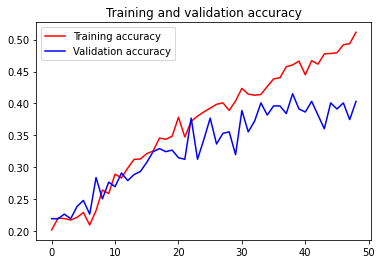

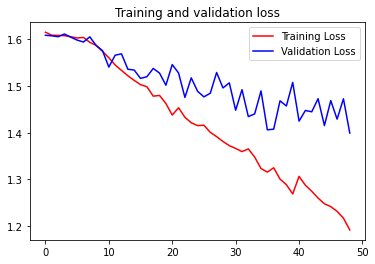

In [ ]:
## just run the bellow cell and see the acc and loss plots

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def load_and_predict(model, path):
  '''
  This function is used to generate the models predictions on test data

  If you loaded your data in other way please change the function to produce your predictions correctly

  If not, just run the cell
  '''
  test_generator = ImageDataGenerator(rescale=1. / 255)

  test_iterator = test_generator.flow_from_directory(
        path,
        target_size=(224, 224),
        shuffle=False,
        class_mode='categorical',
        batch_size=1) 

  ids = []
  for filename in test_iterator.filenames:
    ids.append(filename)

  predict_result = model.predict(test_iterator, steps=len(test_iterator.filenames))
  predictions = []
  for index, prediction in enumerate(predict_result):
    classes = np.argmax(prediction)
    predictions.append([ids[index], classes])
  predictions.sort()

  return predictions

In [ ]:
def store_prediction(model, test_data_path, result_path):
  '''
  A function to run the load and predict function

  just run the cell
  '''
  # model = keras.models.load_model(model_path, compile = True)

  predictions = load_and_predict(model, test_data_path)

  df = pd.DataFrame(data=predictions, columns=['image_id', 'label'])
  df = df.set_index(['image_id'])

  print(df.head())
  print('Writing submission')
  df.to_csv(result_path)

In [ ]:
store_prediction(model, '/content/dataset/dataset/dataset', './results.csv')

Found 2102 images belonging to 5 classes.
iranKhodro_dena/1.jpg
iranKhodro_dena/10.jpg
iranKhodro_dena/100.jpg
iranKhodro_dena/101.jpg
iranKhodro_dena/102.jpg
iranKhodro_dena/103.jpg
iranKhodro_dena/104.jpg
iranKhodro_dena/105.jpg
iranKhodro_dena/106.jpg
iranKhodro_dena/107.jpg
iranKhodro_dena/108.jpg
iranKhodro_dena/109.jpg
iranKhodro_dena/11.jpg
iranKhodro_dena/110.jpg
iranKhodro_dena/111.jpg
iranKhodro_dena/112.jpg
iranKhodro_dena/113.jpg
iranKhodro_dena/114.jpg
iranKhodro_dena/115.jpg
iranKhodro_dena/116.jpg
iranKhodro_dena/117.jpg
iranKhodro_dena/118.jpg
iranKhodro_dena/119.jpg
iranKhodro_dena/12.jpg
iranKhodro_dena/120.jpg
iranKhodro_dena/121.jpg
iranKhodro_dena/122.jpg
iranKhodro_dena/123.jpg
iranKhodro_dena/124.jpg
iranKhodro_dena/125.jpg
iranKhodro_dena/126.jpg
iranKhodro_dena/127.jpg
iranKhodro_dena/128.jpg
iranKhodro_dena/129.jpg
iranKhodro_dena/13.jpg
iranKhodro_dena/130.jpg
iranKhodro_dena/131.jpg
iranKhodro_dena/132.jpg
iranKhodro_dena/133.jpg
iranKhodro_dena/134.jpg
iran

Here your own CNN model implementation has done

## **Transfer learning from a pre-trained model**

This implementation is as the same to the previous one except in the model creation and training sections

So use the other ones for code simplicity 

In [ ]:
def create_cnn_model():
  from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
  from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
  '''
  In this function you need to implement a cnn model from pre-trained one

  We recommand use the MobileNetV2 network

  See the bellow link:

  https://keras.io/api/applications/mobilenet/

  don't forget to fine-tune the last layer

  Use the imagenet weights

  '''
  #####################################
  ##### Your implementation here ######
  image_generator = ImageDataGenerator(
          rescale=1/255,
          rotation_range=10, # rotation
          width_shift_range=0.2, # horizontal shift
          height_shift_range=0.2, # vertical shift
          zoom_range=0.2, # zoom
          horizontal_flip=True, # horizontal flip
          brightness_range=[0.2,1.2],# brightness
          validation_split=0.2,)

  #Train & Validation Split
  train_dataset = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory='/content/dataset/dataset/dataset',
                                                  shuffle=True,
                                                  target_size=(224, 224),
                                                  subset="training",
                                                  class_mode='categorical')

  validation_dataset = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory='/content/dataset/dataset/dataset',
                                                  shuffle=True,
                                                  target_size=(224, 224),
                                                  subset="validation",
                                                  class_mode='categorical')
      
  IMG_SHAPE = (224, 224, 3)
  base_model = MobileNetV2(input_shape=IMG_SHAPE, input_tensor=None,
                                                  include_top=False, 
                                                  weights='imagenet')
  base_model.trainable = True

  model = tf.keras.Sequential()
  model.add(base_model)
  model.add(tf.keras.layers.GlobalAveragePooling2D())
  model.add(tf.keras.layers.Dense(320, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(160, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(40, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(5, activation='softmax'))
  #compile model
  model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9), 
        loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
        metrics=['accuracy'])
  history =  model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset, callbacks=keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=10,
                                            restore_best_weights=True))


  #####################################
  return history, model

In [ ]:
## train the model but don't forget adapte the hyper-parameters

history,model = create_cnn_model()


Found 1683 images belonging to 5 classes.
Found 419 images belonging to 5 classes.
Epoch 1/150
85/85 [==============================] - 44s 464ms/step - loss: 1.5840 - accuracy: 0.2882 - val_loss: 1.5193 - val_accuracy: 0.3174
Epoch 2/150
85/85 [==============================] - 37s 435ms/step - loss: 1.2551 - accuracy: 0.4938 - val_loss: 1.3239 - val_accuracy: 0.4177
Epoch 3/150
85/85 [==============================] - 37s 431ms/step - loss: 0.7643 - accuracy: 0.7207 - val_loss: 1.1095 - val_accuracy: 0.5561
Epoch 4/150
85/85 [==============================] - 36s 428ms/step - loss: 0.5132 - accuracy: 0.8081 - val_loss: 0.7961 - val_accuracy: 0.6826
Epoch 5/150
85/85 [==============================] - 37s 432ms/step - loss: 0.3462 - accuracy: 0.8859 - val_loss: 0.7635 - val_accuracy: 0.7184
Epoch 6/150
85/85 [==============================] - 36s 425ms/step - loss: 0.3032 - accuracy: 0.8966 - val_loss: 0.8074 - val_accuracy: 0.6993
Epoch 7/150
85/85 [==============================] - 

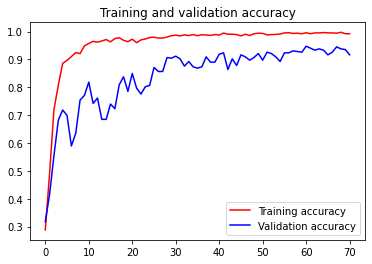

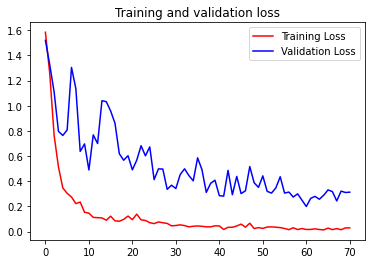

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
store_prediction(model, '/content/dataset/dataset/dataset', './results2.csv')

Found 2102 images belonging to 5 classes.
iranKhodro_dena/1.jpg
iranKhodro_dena/10.jpg
iranKhodro_dena/100.jpg
iranKhodro_dena/101.jpg
iranKhodro_dena/102.jpg
iranKhodro_dena/103.jpg
iranKhodro_dena/104.jpg
iranKhodro_dena/105.jpg
iranKhodro_dena/106.jpg
iranKhodro_dena/107.jpg
iranKhodro_dena/108.jpg
iranKhodro_dena/109.jpg
iranKhodro_dena/11.jpg
iranKhodro_dena/110.jpg
iranKhodro_dena/111.jpg
iranKhodro_dena/112.jpg
iranKhodro_dena/113.jpg
iranKhodro_dena/114.jpg
iranKhodro_dena/115.jpg
iranKhodro_dena/116.jpg
iranKhodro_dena/117.jpg
iranKhodro_dena/118.jpg
iranKhodro_dena/119.jpg
iranKhodro_dena/12.jpg
iranKhodro_dena/120.jpg
iranKhodro_dena/121.jpg
iranKhodro_dena/122.jpg
iranKhodro_dena/123.jpg
iranKhodro_dena/124.jpg
iranKhodro_dena/125.jpg
iranKhodro_dena/126.jpg
iranKhodro_dena/127.jpg
iranKhodro_dena/128.jpg
iranKhodro_dena/129.jpg
iranKhodro_dena/13.jpg
iranKhodro_dena/130.jpg
iranKhodro_dena/131.jpg
iranKhodro_dena/132.jpg
iranKhodro_dena/133.jpg
iranKhodro_dena/134.jpg
iran

## **Grad-CAM**
For some random images from different classes, show the heatmaps based on the grad-cam algorithm that you have learned.

In [ ]:
def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)

    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )


    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (224, 224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_6   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_31 (Dense)            (None, 320)               409920    
                                                                 
 dropout_18 (Dropout)        (None, 320)               0         
                                                                 
 dense_32 (Dense)            (None, 160)               51360     
                                                                 
 dropout_19 (Dropout)        (None, 160)              

In [ ]:
import glob

img_array = preprocess_input(get_img_array(glob.glob("/content/dataset/dataset/dataset/mazda_3/*")[0], size=img_size))
model.layers[-1].activation = None

print(model.layers[-1].name)

heatmap = make_gradcam_heatmap(img_array, model, model.layers[-1].name)

plt.matshow(heatmap)
plt.show()

dense_34


InvalidArgumentError: ignored